In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [74]:
def quadratic_function(t, a, b, tau1, tau2 , omega ,phi):
    return a * (1-np.exp((-t)/tau1)) + b * np.exp((-t)/tau2)*np.cos(omega*t+phi)


In [84]:
data = np.load('4AB_bulk_intensity.npz')
print(data.files)
data1 = np.load('4AB_bulk_time.npz')
print(data1.files)
data2 = np.load('5AB_bulk_intensity.npz')
print(data2.files)
data3 = np.load('5AB_bulk_time.npz')
print(data3.files)
data4 = np.load('6AB_bulk_intensity.npz')
print(data4.files)
data5 = np.load('6AB_bulk_time.npz')
print(data5.files)
data6 = np.load('7AB_bulk_intensity.npz')
print(data6.files)
data7 = np.load('7AB_bulk_time.npz')
print(data7.files)

['Efavg_4AB']
['time_4AB']
['Efavg_5AB']
['time_5AB']
['Efavg_6AB']
['time_6AB']
['Efavg_7AB']
['time_7AB']


In [85]:
x_data = data['Efavg_4AB']
y_data = data1['time_4AB']
x_data1 = data2['Efavg_5AB']
y_data1 = data3['time_5AB']
x_data2 = data4['Efavg_6AB']
y_data2 = data5['time_6AB']
x_data3 = data6['Efavg_7AB']
y_data3 = data7['time_7AB']

In [86]:
# 初始猜测的参数值（a, b, c）
initial_guess = [1, 1, 1 , 1 , 1 ,1]

# 执行拟合
params, covariance = curve_fit(quadratic_function, x_data, y_data, p0=initial_guess)


In [87]:
# 初始猜测的参数值（a, b, c）
initial_guess1 = [1, 1, 1 , 1 , 1 ,1]

# 执行拟合
params1, covariance1 = curve_fit(quadratic_function, x_data1, y_data1, p0=initial_guess)

In [88]:
# 初始猜测的参数值（a, b, c）
initial_guess2 = [1, 1, 1 , 1 , 1 ,1]

# 执行拟合
params2, covariance2 = curve_fit(quadratic_function, x_data2, y_data2, p0=initial_guess)

In [89]:
# 初始猜测的参数值（a, b, c）
initial_guess3 = [1, 1, 1 , 1 , 1 ,1]

# 执行拟合
params3, covariance3 = curve_fit(quadratic_function, x_data3, y_data3, p0=initial_guess)

Curve fitting: a=6.698149901268756, b=4.021878290598092, tau1=1.567686329056835, tau2=10.861822694392846, omega=0.4701795437528648, phi=1.6521880792176846
Curve fitting: a=6.680204391118446, b=4.0173798425902625, tau1=1.4863088326942908, tau2=11.329136045333032, omega=0.45144181678344525, phi=1.7126943172063018
Curve fitting: a=6.662735910623198, b=3.9593434552380726, tau1=1.433269134227154, tau2=11.896473293046652, omega=0.4339105789492131, phi=1.7720615683241252
Curve fitting: a=6.645266959393419, b=3.8690177318580483, tau1=1.399298161185546, tau2=12.54168146229267, omega=0.41733452321065, phi=1.8309585206889278


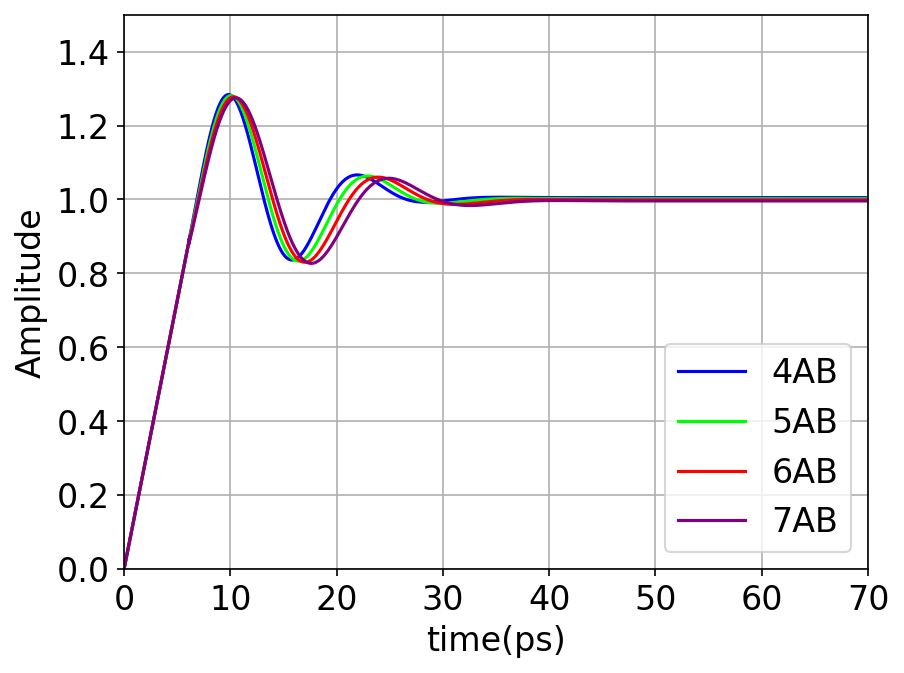

In [90]:
# 提取拟合参数
a, b, tau1, tau2,omega ,phi = params
print(f"Curve fitting: a={a}, b={b}, tau1={tau1}, tau2={tau2}, omega={omega}, phi={phi}")
# 提取拟合参数
a1, b1, tau11, tau21,omega1 ,phi1 = params1
print(f"Curve fitting: a={a1}, b={b1}, tau1={tau11}, tau2={tau21}, omega={omega1}, phi={phi1}")# 提取拟合参数
a2, b2, tau12, tau22,omega2 ,phi2 = params2
print(f"Curve fitting: a={a2}, b={b2}, tau1={tau12}, tau2={tau22}, omega={omega2}, phi={phi2}")# 提取拟合参数
a3, b3, tau13, tau23,omega3 ,phi3 = params3
print(f"Curve fitting: a={a3}, b={b3}, tau1={tau13}, tau2={tau23}, omega={omega3}, phi={phi3}")
# 使用拟合参数生成拟合曲线
plt.figure(dpi=150)
x_fit = np.linspace(0, 70, 1000)
y_fit = quadratic_function(x_fit, a, b, tau1, tau2,omega ,phi)
x_fit1 = np.linspace(0, 70, 1000)
y_fit1 = quadratic_function(x_fit1, a1, b1, tau11, tau21,omega1 ,phi1)
x_fit2 = np.linspace(0, 70, 1000)
y_fit2 = quadratic_function(x_fit2, a2, b2, tau12, tau22,omega2 ,phi2)
x_fit3 = np.linspace(0, 70, 1000)
y_fit3 = quadratic_function(x_fit3, a3, b3, tau13, tau23,omega3 ,phi3)
# 绘制原始数据和拟合曲线
plt.rcParams.update({'font.size': 16})
plt.plot(x_data, 1.2*y_data/8 ,color='b', label='4AB')
plt.plot(x_data1, 1.2*y_data1/8 ,color='Lime', label='5AB')
plt.plot(x_data2, 1.2*y_data2/8 ,color='red', label='6AB')
plt.plot(x_data3, 1.2*y_data3/8 ,color='Purple', label='7AB')
#plt.plot(x_fit, y_fit/6.7, color='red', label='Curve fitting')
#plt.plot(x_fit1, y_fit1/6.7, color='red', label='Curve fitting1')
#plt.plot(x_fit2, y_fit2/6.7, color='red', label='Curve fitting2')
#plt.plot(x_fit3, y_fit3/6.7, color='red', label='Curve fitting3')
plt.xlim(0,70)
plt.ylim(0,1.5)
plt.xlabel('time(ps)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.legend()
plt.savefig('allAB_1000K_in.png')
plt.show()


In [98]:
def quadratic_function(t,c, a, b, tau1, tau2 , omega ,phi):
    return  c - a * (1-np.exp((-t)/tau1)) + b * np.exp((-t)/tau2)*np.cos(omega*t+phi)


In [121]:
data = np.load('4AB_edge_intensity.npz')
print(data.files)
data1 = np.load('4AB_edge_time.npz')
print(data1.files)
data2 = np.load('5AB_edge_intensity.npz')
print(data2.files)
data3 = np.load('5AB_edge_time.npz')
print(data3.files)
data4 = np.load('6AB_edge_intensity.npz')
print(data4.files)
data5 = np.load('6AB_edge_time.npz')
print(data5.files)
data6 = np.load('7AB_edge_intensity.npz')
print(data6.files)
data7 = np.load('7AB_edge_time.npz')
print(data7.files)
data8 = np.load('8AB_edge_intensity.npz')
print(data8.files)
data9 = np.load('8AB_edge_time.npz')
print(data9.files)
data10 = np.load('9AB_edge_intensity.npz')
print(data10.files)
data11 = np.load('9AB_edge_time.npz')
print(data11.files)

['Efavg_4AB']
['time_4AB']
['Efavg_5AB']
['time_5AB']
['Efavg_6AB']
['time_6AB']
['Efavg_7AB']
['time_7AB']
['Efavg_8AB']
['time_8AB']
['Efavg_9AB']
['time_9AB']


In [122]:
x_data = data['Efavg_4AB']
y_data = data1['time_4AB']
x_data1 = data2['Efavg_5AB']
y_data1 = data3['time_5AB']
x_data2 = data4['Efavg_6AB']
y_data2 = data5['time_6AB']
x_data3 = data6['Efavg_7AB']
y_data3 = data7['time_7AB']
x_data4 = data8['Efavg_8AB']
y_data4 = data9['time_8AB']
x_data5 = data10['Efavg_9AB']
y_data5 = data11['time_9AB']

In [123]:
# 初始猜测的参数值（a, b, c）
initial_guess = [1,1, 1, 1,1,1,1]

# 执行拟合
params, covariance = curve_fit(quadratic_function, x_data, y_data, p0=initial_guess)

/tmp/ipykernel_246098/789723393.py:2: RuntimeWarning: overflow encountered in exp
  return  c - a * (1-np.exp((-t)/tau1)) + b * np.exp((-t)/tau2)*np.cos(omega*t+phi)
/tmp/ipykernel_246098/789723393.py:2: RuntimeWarning: overflow encountered in multiply
  return  c - a * (1-np.exp((-t)/tau1)) + b * np.exp((-t)/tau2)*np.cos(omega*t+phi)


In [124]:
# 初始猜测的参数值（a, b, c）
initial_guess = [1,1, 1, 1,1,1,1]

# 执行拟合
params1, covariance1 = curve_fit(quadratic_function, x_data1, y_data1, p0=initial_guess)

/tmp/ipykernel_246098/789723393.py:2: RuntimeWarning: overflow encountered in exp
  return  c - a * (1-np.exp((-t)/tau1)) + b * np.exp((-t)/tau2)*np.cos(omega*t+phi)


In [127]:
# 初始猜测的参数值（a, b, c）
initial_guess = [1,1, 1, 1,1,1,1]

# 执行拟合
params2, covariance2 = curve_fit(quadratic_function, x_data2, y_data2, p0=initial_guess)

/tmp/ipykernel_246098/789723393.py:2: RuntimeWarning: overflow encountered in exp
  return  c - a * (1-np.exp((-t)/tau1)) + b * np.exp((-t)/tau2)*np.cos(omega*t+phi)


Curve fitting: c=4.071832832726379,a=-1.3253786889616246, b=4.548185919350321, tau1=0.17783337848520553, tau2=10.610376433401335, omega=0.774677863031269, phi=9.085235495295722
Curve fitting: c=4.069859036917182, a=-1.1282658645191754, b=-4.449022852582407, tau1=0.15400613390648696, tau2=10.95342620303998, omega=0.759533532019127, phi=-0.2928611730017367
Curve fitting: c=4.148462434205604,a=-0.35086086826462687, b=4.31045327103349, tau1=0.000596178668954235, tau2=11.372850176649527, omega=0.749426131602725, phi=2.8665704044416676


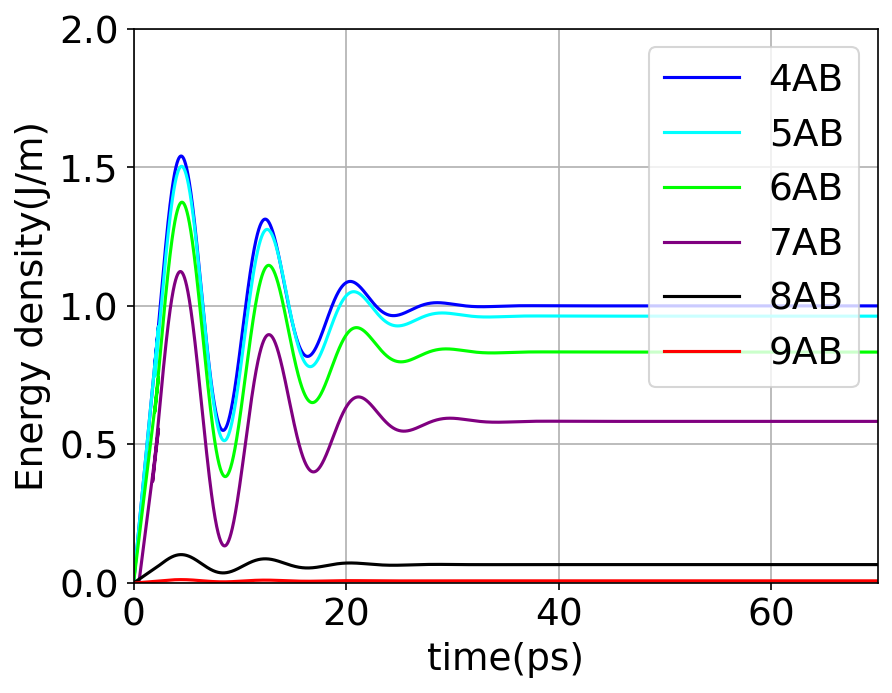

In [131]:
# 提取拟合参数
c,a, b, tau1, tau2,omega ,phi = params
print(f"Curve fitting: c={c},a={a}, b={b}, tau1={tau1}, tau2={tau2}, omega={omega}, phi={phi}")
# 提取拟合参数
c1,a1, b1, tau11, tau21,omega1 ,phi1 = params1
print(f"Curve fitting: c={c1}, a={a1}, b={b1}, tau1={tau11}, tau2={tau21}, omega={omega1}, phi={phi1}")# 提取拟合参数
c2,a2, b2, tau12, tau22,omega2 ,phi2 = params2
print(f"Curve fitting: c={c2},a={a2}, b={b2}, tau1={tau12}, tau2={tau22}, omega={omega2}, phi={phi2}")# 提取拟合参数
#c3,a3, b3, tau13, tau23,omega3 ,phi3 = params3
#print(f"Curve fitting: c={c3},a={a3}, b={b3}, tau1={tau13}, tau2={tau23}, omega={omega3}, phi={phi3}")
# 使用拟合参数生成拟合曲线
x_fit = np.linspace(0, 70, 1000)
y_fit = quadratic_function(x_fit,c, a, b, tau1, tau2,omega ,phi)
x_fit1 = np.linspace(0, 70, 1000)
y_fit1 = quadratic_function(x_fit1,c1, a1, b1, tau11, tau21,omega1 ,phi1)
x_fit2 = np.linspace(0, 70, 1000)
y_fit2 = quadratic_function(x_fit2,c2, a2, b2, tau12, tau22,omega2 ,phi2)
#x_fit3 = np.linspace(0, 70, 1000)
#y_fit3 = quadratic_function(x_fit3,c3, a3, b3, tau13, tau23,omega3 ,phi3)
plt.figure(dpi=150)
# 绘制原始数据和拟合曲线
plt.rcParams.update({'font.size': 18})
plt.plot(x_data, y_data/5.4,color='b', label='4AB')
plt.plot(x_data1, y_data1/5.4,color='Cyan', label='5AB')
plt.plot(x_data2, y_data2/5.4,color='Lime', label='6AB')
plt.plot(x_data3, y_data3/5.4,color='Purple', label='7AB')
plt.plot(x_data4, y_data4/5.4,color='black', label='8AB')
plt.plot(x_data5, y_data5/5.4,color='r', label='9AB')
#plt.plot(x_fit, y_fit/5.4, color='red', label='Curve fitting')
#plt.plot(x_fit1, y_fit1/5.4, color='red', label='Curve fitting1')
#plt.plot(x_fit2, y_fit2/5.4, color='red', label='Curve fitting2')
#plt.plot(x_fit3, y_fit3/5.4, color='red', label='Curve fitting3')
plt.xlim(0,70)
plt.ylim(0,2)
plt.xlabel('time(ps)')
plt.ylabel('Energy density(J/m)')
plt.grid(True)
plt.legend(loc="upper right")
plt.savefig('allAB_1000K_out.png')
plt.show()